In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
train_set = pd.read_csv('train_engineered_features.csv')
train_set = train_set.loc[:, train_set.columns != 'Unnamed: 0']
train_set.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,damage_grade,more_families_than_mean,older_than_mean,cant_materials,mean_damage_per_count_floor,mean_damage_level_1,height per area,mean_damage_level_1_per_plan_configuration,most_damaged_region,less_damaged_region
0,802906,6,487,12198,2,30,6,5,t,r,...,3,False,True,2,2.24,2.161724,0.833333,2.169963,0,0
1,633759,6,706,12267,2,5,7,5,t,r,...,2,False,False,1,2.24,2.161724,0.714286,2.169963,0,0
2,157370,6,706,11722,2,20,4,4,t,r,...,2,False,False,1,2.24,2.161724,1.000000,2.169963,0,0
3,33651,6,1210,9423,3,40,5,7,t,r,...,3,False,True,1,2.40,2.161724,1.400000,2.169963,0,0
4,1005736,6,724,7981,2,10,5,5,t,r,...,2,False,False,1,2.24,2.161724,1.000000,2.169963,0,0


In [57]:
train_set["land_surface_condition"]               = train_set["land_surface_condition"].astype("category")
train_set["foundation_type"]                      = train_set["foundation_type"].astype("category")
train_set["roof_type"]                            = train_set["roof_type"].astype("category")
train_set["ground_floor_type"]                    = train_set["ground_floor_type"].astype("category")
train_set["other_floor_type"]                     = train_set["other_floor_type"].astype("category")
train_set["position"]                             = train_set["position"].astype("category")
train_set["plan_configuration"]                   = train_set["plan_configuration"].astype("category")
train_set["legal_ownership_status"]               = train_set["legal_ownership_status"].astype("category")

In [58]:
X = train_set.drop(['damage_grade','building_id'],axis=1)
y = train_set.loc[:,'damage_grade']

# Sequential feature selection (usando ordinal encoding)
Backward selection



Encodeamos las features categoricas usando ordinal encoder

In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 47 columns):
 #   Column                                      Non-Null Count   Dtype   
---  ------                                      --------------   -----   
 0   geo_level_1_id                              260601 non-null  int64   
 1   geo_level_2_id                              260601 non-null  int64   
 2   geo_level_3_id                              260601 non-null  int64   
 3   count_floors_pre_eq                         260601 non-null  int64   
 4   age                                         260601 non-null  int64   
 5   area_percentage                             260601 non-null  int64   
 6   height_percentage                           260601 non-null  int64   
 7   land_surface_condition                      260601 non-null  category
 8   foundation_type                             260601 non-null  category
 9   roof_type                                   260601 non-null

In [60]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

#obj_df["make_code"] = ord_enc.fit_transform(obj_df[["make"]])
#obj_df[["make", "make_code"]].head(11)

X_ConEncoding = X.drop(['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type',\
                       'position','plan_configuration','legal_ownership_status'],axis=1)

X_ConEncoding['land_surface_condition_code'] = ord_enc.fit_transform(X[['land_surface_condition']])
X_ConEncoding['foundation_type_code'] = ord_enc.fit_transform(X[['foundation_type']])
X_ConEncoding['roof_type_code'] = ord_enc.fit_transform(X[['roof_type']])
X_ConEncoding['ground_floor_type_code'] = ord_enc.fit_transform(X[['ground_floor_type']])
X_ConEncoding['other_floor_type_code'] = ord_enc.fit_transform(X[['other_floor_type']])
X_ConEncoding['position_code'] = ord_enc.fit_transform(X[['position']])
X_ConEncoding['plan_configuration_code'] = ord_enc.fit_transform(X[['plan_configuration']])
X_ConEncoding['legal_ownership_status_code'] = ord_enc.fit_transform(X[['legal_ownership_status']])

In [62]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()


tic_fwd = time()
sfs_forward = SequentialFeatureSelector(rf_clf, n_features_to_select=25,
                                        direction='backward',scoring='f1_micro').fit(X_ConEncoding, y)
toc_fwd = time()

print("Features selected by forward sequential selection: "
      f"{feature_names[sfs_forward.get_support()]}")
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

KeyboardInterrupt: 

# A partir de aca no correr

In [29]:
X_SinCategoricas = X.drop(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration','legal_ownership_status'],axis=1)
X_SinCategoricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   geo_level_1_id                              260601 non-null  int64  
 1   geo_level_2_id                              260601 non-null  int64  
 2   geo_level_3_id                              260601 non-null  int64  
 3   count_floors_pre_eq                         260601 non-null  int64  
 4   age                                         260601 non-null  int64  
 5   area_percentage                             260601 non-null  int64  
 6   height_percentage                           260601 non-null  int64  
 7   has_superstructure_adobe_mud                260601 non-null  int64  
 8   has_superstructure_mud_mortar_stone         260601 non-null  int64  
 9   has_superstructure_stone_flag               260601 non-null  int64  
 


# Selecting features based on importance


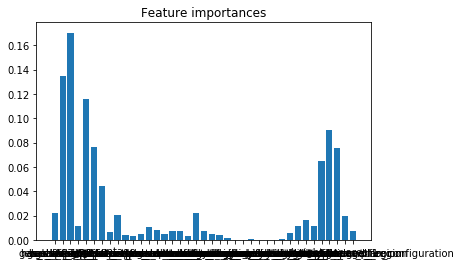

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_SinCategoricas, y)
importance = np.abs(rf_clf.feature_importances_)
feature_names = np.array(X_SinCategoricas.columns)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances")
plt.show()



In [8]:
from sklearn.feature_selection import SelectFromModel
from time import time

threshold = np.sort(importance)[-8] + 0.01

tic = time()
sfm = SelectFromModel(rf_clf, threshold=threshold).fit(X_SinCategoricas, y)
toc = time()
print("Features selected by SelectFromModel: "
      f"{feature_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")

Features selected by SelectFromModel: ['geo_level_2_id' 'geo_level_3_id' 'age' 'area_percentage'
 'mean_damage_level_1' 'height per area'
 'mean_damage_level_1_per_plan_configuration']
Done in 84.866s


Calculo importancia usando permutation_importance

In [ ]:
from sklearn.inspection import permutation_importance
permutationImportance = permutation_importance(rf_clf, X_SinCategoricas, y, scoring='f1_micro',n_jobs=-1, n_repeats=10,random_state=0)
permutationImportance

In [ ]:
threshold = np.sort(permutationImportance.importances_mean)[-8] + 0.01

tic = time()
sfm = SelectFromModel(rf_clf, threshold=threshold).fit(X_SinCategoricas, y)
toc = time()
print("Features selected by SelectFromModel: "
    f"{feature_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")

# Sequential feature selection
forward selection

In [ ]:
#from sklearn.feature_selection import SequentialFeatureSelector


#tic_fwd = time()
#sfs_forward = SequentialFeatureSelector(rf_clf, n_features_to_select=15,
#                                        direction='forward').fit(X_SinCategoricas, y)
#toc_fwd = time()

#print("Features selected by forward sequential selection: "
#      f"{feature_names[sfs_forward.get_support()]}")
#print(f"Done in {toc_fwd - tic_fwd:.3f}s")

# Selecting features based on importance
## Con LightGBM para contemplar variables categoricas

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 47 columns):
 #   Column                                      Non-Null Count   Dtype   
---  ------                                      --------------   -----   
 0   geo_level_1_id                              260601 non-null  int64   
 1   geo_level_2_id                              260601 non-null  int64   
 2   geo_level_3_id                              260601 non-null  int64   
 3   count_floors_pre_eq                         260601 non-null  int64   
 4   age                                         260601 non-null  int64   
 5   area_percentage                             260601 non-null  int64   
 6   height_percentage                           260601 non-null  int64   
 7   land_surface_condition                      260601 non-null  category
 8   foundation_type                             260601 non-null  category
 9   roof_type                                   260601 non-null

[1]	training's multi_logloss: 0.869242
[2]	training's multi_logloss: 0.837254
[3]	training's multi_logloss: 0.812172
[4]	training's multi_logloss: 0.791771
[5]	training's multi_logloss: 0.775065
[6]	training's multi_logloss: 0.761093
[7]	training's multi_logloss: 0.749424
[8]	training's multi_logloss: 0.739411
[9]	training's multi_logloss: 0.730723
[10]	training's multi_logloss: 0.723437
[11]	training's multi_logloss: 0.716934
[12]	training's multi_logloss: 0.711256
[13]	training's multi_logloss: 0.705981
[14]	training's multi_logloss: 0.701436
[15]	training's multi_logloss: 0.697256
[16]	training's multi_logloss: 0.693709
[17]	training's multi_logloss: 0.690466
[18]	training's multi_logloss: 0.687534
[19]	training's multi_logloss: 0.684973
[20]	training's multi_logloss: 0.682594
[21]	training's multi_logloss: 0.680474
[22]	training's multi_logloss: 0.678311
[23]	training's multi_logloss: 0.676494
[24]	training's multi_logloss: 0.674587
[25]	training's multi_logloss: 0.67298
[26]	train

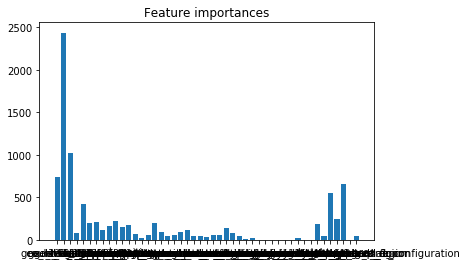

In [31]:
import lightgbm as lgb
lgb_clas = lgb.LGBMClassifier(boosting_type = 'gbdt', 
                                   verbose_eval = 20,
                              #early_stopping_rounds = 3,
                              n_jobs=4,
                             eval_metric= "f1_micro")

lgb_clas.fit(X,y,eval_set=(X, y))
importance = np.abs(lgb_clas.feature_importances_)
feature_names = np.array(X.columns)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances")
plt.show()



In [32]:
from sklearn.feature_selection import SelectFromModel
from time import time

threshold = np.sort(importance)[-8] + 0.01

tic = time()
sfm = SelectFromModel(lgb_clas, threshold=threshold).fit(X, y)
toc = time()
print("Features selected by SelectFromModel: "
      f"{feature_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")

Features selected by SelectFromModel: ['geo_level_1_id' 'geo_level_2_id' 'geo_level_3_id' 'age'
 'mean_damage_level_1' 'height per area'
 'mean_damage_level_1_per_plan_configuration']
Done in 8.435s


Calculo importancia usando permutation_importance

In [33]:
from sklearn.inspection import permutation_importance
permutationImportance = permutation_importance(lgb_clas, X, y, scoring='f1_micro',n_jobs=-1, n_repeats=10,random_state=0)
permutationImportance

{'importances_mean': array([9.70180467e-03, 3.57546594e-02, 8.46850166e-03, 1.15617361e-03,
        1.16012602e-02, 3.43513647e-03, 1.61396157e-03, 2.08057529e-03,
        1.11185299e-02, 5.78508908e-03, 5.79890330e-03, 1.59032391e-02,
        1.94204934e-03, 3.64541963e-05, 8.70679698e-04, 1.33334101e-02,
        1.47735427e-03, 5.71371560e-04, 1.05678796e-03, 5.03835365e-03,
        1.72908009e-03, 2.79354262e-04, 2.34458041e-04, 6.33151830e-05,
        6.11663040e-04, 6.00151189e-04, 1.74711532e-03, 2.92631264e-03,
        3.02761693e-04, 2.64772583e-05, 1.18572070e-04, 0.00000000e+00,
        0.00000000e+00, 3.45355544e-06, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.79660477e-05, 0.00000000e+00, 0.00000000e+00,
        2.72677388e-03, 1.50805254e-03, 1.78990104e-02, 2.33421975e-03,
        1.25778489e-01, 0.00000000e+00, 3.71832802e-04]),
 'importances_std': array([2.70434874e-04, 1.93530395e-04, 2.01539246e-04, 7.74152395e-05,
        2.53080723e-04, 2.95504740e-04,

In [34]:
threshold = np.sort(permutationImportance.importances_mean)[-8] + 0.01

tic = time()
sfm = SelectFromModel(lgb_clas, threshold=threshold).fit(X, y)
toc = time()
print("Features selected by SelectFromModel: "
    f"{feature_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")

[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: eval_metric
Features selected by SelectFromModel: ['geo_level_1_id' 'geo_level_2_id' 'geo_level_3_id' 'count_floors_pre_eq'
 'age' 'area_percentage' 'height_percentage' 'land_surface_condition'
 'foundation_type' 'roof_type' 'ground_floor_type' 'other_floor_type'
 'position' 'plan_configuration' 'has_superstructure_adobe_mud'
 'has_superstructure_mud_mortar_stone' 'has_superstructure_stone_flag'
 'has_superstructure_cement_mortar_stone'
 'has_superstructure_mud_mortar_brick'
 'has_superstructure_cement_mortar_brick' 'has_superstructure_timber'
 'has_superstructure_bamboo' 'has_superstructure_rc_non_engineered'
 'has_superstructure_rc_engineered' 'has_superstructure_other'
 'legal_ownership_status' 'count_families' 'has_secondary_use'
 'has_secondary_use_agriculture' 'has_secondary_use_hotel'
 'has_secondary_use_rental' 'has_secondary_use_industry'
 'has_secondary_use_other' 'cant_materials' 'me